In [52]:
import pandas as pd
import mlxtend as mle
import pickle
import numpy as np
from lightgbm import LGBMRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
split = 1
tgt = 'Water_norm'
with open(f'/home/anton/Repos/untapped-nrj/data/interim/{tgt}_for_sfe.pck','rb') as f:
    dataset = pickle.load(f)
X_train = dataset[f'X_{split}']
y_train = dataset[f'y_{split}']

X_holdout = dataset[f'X_holdout_{split}']
y_holdout = dataset[f'y_holdout_{split}']
    
class LogLGBM(LGBMRegressor):
    def fit(self, X, Y, **kwargs):
        y_train = np.log1p(Y)
        super(LogLGBM, self).fit(X, y_train, **kwargs)

        return self

    def predict(self, X):
        preds = super(LogLGBM, self).predict(X)
        preds = np.expm1(preds)
        return preds    
model = LogLGBM(
            learning_rate=0.08,
            n_estimators=500,
            objective="mse",
            num_leaves=32,
            random_state=123
        )

In [54]:
sfs =SFS(estimator=model,k_features = (8,40),
            floating=True, 
          scoring='neg_mean_absolute_error',cv=5,n_jobs=-1,verbose= 1)
sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    5.0s finished
Features: 1/40[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.8s finished
Features: 2/40[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.6s finished
Features: 3/40[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent wo

Features: 21/40[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:   10.4s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:    6.1s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    9.5s finished
Features: 22/40[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed:   10.3s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  22 | elapsed:    6.5s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    9.8s finished
Features: 23/40[Parallel(n_jobs=-1)]: Using backend Lo

Features: 32/40[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:   10.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   22.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:   21.4s finished
Features: 32/40[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   22.1s finished
Features: 33/40[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  13 | elapsed:   10.2s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   1

(-1.8, -1.3)

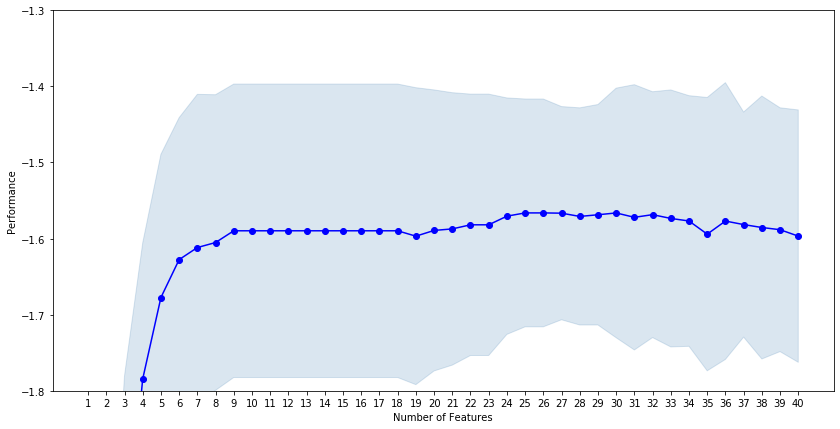

In [56]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev',figsize = (14,7))
plt.ylim([-1.8,-1.3])

In [60]:
feats = sfs.get_metric_dict()[27]['feature_names']
set(X_train.columns) -set(feats)

{'ConfidentialReleaseDate',
 'DaysDrilling',
 'DrillMetresPerDay',
 'FinalDrillDate',
 'GroundElevation',
 'HZLength',
 'KBElevation',
 'LaheeClass',
 'LicenceDate',
 'Licensee',
 'ProjectedDepth',
 'SpudDate',
 'TotalDepth',
 '_Fracture`Stages',
 'cf_timediff',
 'final_timediff',
 'lic_timediff',
 'rrd_timediff',
 'st_timediff'}

{1: {'feature_idx': (37,),
  'cv_scores': array([-3.12105445, -2.40472374, -2.88149531, -2.55422945, -2.34325355]),
  'avg_score': -2.6609513000843683,
  'feature_names': ('UnitName',),
  'ci_bound': 0.380545340327349,
  'std_dev': 0.2960772031506285,
  'std_err': 0.14803860157531426},
 2: {'feature_idx': (0, 37),
  'cv_scores': array([-2.91610008, -2.18634687, -2.6516109 , -2.35737642, -2.1618713 ]),
  'avg_score': -2.4546611148818256,
  'feature_names': ('CurrentOperator', 'UnitName'),
  'ci_bound': 0.37202361518835403,
  'std_dev': 0.28944701148147906,
  'std_err': 0.14472350574073953},
 3: {'feature_idx': (0, 27, 37),
  'cv_scores': array([-2.36022114, -1.83490575, -2.25850098, -2.0122536 , -1.69084283]),
  'avg_score': -2.0313448584868903,
  'feature_names': ('CurrentOperator', 'StatusDate', 'UnitName'),
  'ci_bound': 0.3224282059741006,
  'std_dev': 0.25086009819373345,
  'std_err': 0.12543004909686672},
 4: {'feature_idx': (0, 5, 27, 37),
  'cv_scores': array([-2.01218397, -1.68

In [1]:
from itertools import product
import pandas as pd

In [6]:
b = pd.Series(['aasd123','b123','c1','dasd22'])
b.str.count("[0-9]")

0    3
1    3
2    1
3    2
dtype: int64